In [39]:
import pandas as pd

# Load the data from CSV
df = pd.read_csv('../data/financial_news_headlines.csv')

# Display the first few rows of the DataFrame
print(df.head())

                                            headline          published_at
0  Dividend, stock-split: IDFC, ARC Finance, Veda...  2024-10-09T03:21:13Z
1  Hyundai Motor India's Rs 27,856 crore IPO open...  2024-10-09T03:21:07Z
2  Tiger Brokers' Yang Xu Shares Insights on Bitc...  2024-10-09T03:12:04Z
3  Top German Dividend Stocks To Watch In October...  2024-10-09T03:07:48Z
4  Oil prices steady after sliding on potential I...  2024-10-09T03:06:35Z


In [40]:
# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values, if any
df = df.dropna()

# Check for duplicates
df = df.drop_duplicates()

print(f"Number of rows after cleaning: {len(df)}")


headline        0
published_at    0
dtype: int64
Number of rows after cleaning: 99


In [41]:
import re

# Function to clean the text
def clean_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply cleaning function to each headline
df['cleaned_headline'] = df['headline'].apply(clean_text)

# Display the cleaned data
print(df[['headline', 'cleaned_headline']].head())


                                            headline  \
0  Dividend, stock-split: IDFC, ARC Finance, Veda...   
1  Hyundai Motor India's Rs 27,856 crore IPO open...   
2  Tiger Brokers' Yang Xu Shares Insights on Bitc...   
3  Top German Dividend Stocks To Watch In October...   
4  Oil prices steady after sliding on potential I...   

                                    cleaned_headline  
0  dividend stocksplit idfc arc finance vedanta  ...  
1  hyundai motor indias rs  crore ipo opens on th...  
2  tiger brokers yang xu shares insights on bitco...  
3    top german dividend stocks to watch in october   
4  oil prices steady after sliding on potential i...  


Tokenization TODO

In [42]:
df['cleaned_headline']

0     dividend stocksplit idfc arc finance vedanta  ...
1     hyundai motor indias rs  crore ipo opens on th...
2     tiger brokers yang xu shares insights on bitco...
3       top german dividend stocks to watch in october 
4     oil prices steady after sliding on potential i...
                            ...                        
95    investors could be concerned with betamek berh...
96    us stocks ended higher as investors await infl...
97                                              removed
98        overlooked dividend stocks that analysts love
99    catastrophe bond investors brace for huge loss...
Name: cleaned_headline, Length: 99, dtype: object

In [43]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

df['token'] = df['cleaned_headline'].apply(word_tokenize)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ah006\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
df[['cleaned_headline','token']].head()

,cleaned_headline,token
0,dividend stocksplit idfc arc finance vedanta ...,"[dividend, stocksplit, idfc, arc, finance, ved..."
1,hyundai motor indias rs crore ipo opens on th...,"[hyundai, motor, indias, rs, crore, ipo, opens..."
2,tiger brokers yang xu shares insights on bitco...,"[tiger, brokers, yang, xu, shares, insights, o..."
3,top german dividend stocks to watch in october,"[top, german, dividend, stocks, to, watch, in,..."
4,oil prices steady after sliding on potential i...,"[oil, prices, steady, after, sliding, on, pote..."


In [45]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define stopwords list
stop_words = set(stopwords.words('english'))

# Remove stopwords from tokens
df['tokens'] = df['token'].apply(lambda x: [word for word in x if word not in stop_words])

# Show the tokens without stopwords
print(df[['cleaned_headline', 'tokens']].head())


                                    cleaned_headline  \
0  dividend stocksplit idfc arc finance vedanta  ...   
1  hyundai motor indias rs  crore ipo opens on th...   
2  tiger brokers yang xu shares insights on bitco...   
3    top german dividend stocks to watch in october    
4  oil prices steady after sliding on potential i...   

                                              tokens  
0  [dividend, stocksplit, idfc, arc, finance, ved...  
1  [hyundai, motor, indias, rs, crore, ipo, opens...  
2  [tiger, brokers, yang, xu, shares, insights, b...  
3    [top, german, dividend, stocks, watch, october]  
4  [oil, prices, steady, sliding, potential, isra...  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ah006\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Lemmatize tokens
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Display the lemmatized tokens
print(df[['cleaned_headline', 'tokens']].head())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ah006\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ah006\AppData\Roaming\nltk_data...


                                    cleaned_headline  \
0  dividend stocksplit idfc arc finance vedanta  ...   
1  hyundai motor indias rs  crore ipo opens on th...   
2  tiger brokers yang xu shares insights on bitco...   
3    top german dividend stocks to watch in october    
4  oil prices steady after sliding on potential i...   

                                              tokens  
0  [dividend, stocksplit, idfc, arc, finance, ved...  
1  [hyundai, motor, india, r, crore, ipo, open, t...  
2  [tiger, broker, yang, xu, share, insight, bitc...  
3     [top, german, dividend, stock, watch, october]  
4  [oil, price, steady, sliding, potential, israe...  


[nltk_data]   Package omw-1.4 is already up-to-date!


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokens back into sentences
df['joined_tokens'] = df['tokens'].apply(lambda x: ' '.join(x))

# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['joined_tokens'])

# Convert to DataFrame for easy analysis
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df.head())


   according  accuse  action  activates  adani  advance  ahead   ai  aif  \
0        0.0     0.0     0.0        0.0    0.0      0.0    0.0  0.0  0.0   
1        0.0     0.0     0.0        0.0    0.0      0.0    0.0  0.0  0.0   
2        0.0     0.0     0.0        0.0    0.0      0.0    0.0  0.0  0.0   
3        0.0     0.0     0.0        0.0    0.0      0.0    0.0  0.0  0.0   
4        0.0     0.0     0.0        0.0    0.0      0.0    0.0  0.0  0.0   

   alert  ...  wing  winning  within  worried  wrap   wu       xu  yahoo  \
0    0.0  ...   0.0      0.0     0.0      0.0   0.0  0.0  0.00000    0.0   
1    0.0  ...   0.0      0.0     0.0      0.0   0.0  0.0  0.00000    0.0   
2    0.0  ...   0.0      0.0     0.0      0.0   0.0  0.0  0.28122    0.0   
3    0.0  ...   0.0      0.0     0.0      0.0   0.0  0.0  0.00000    0.0   
4    0.0  ...   0.0      0.0     0.0      0.0   0.0  0.0  0.00000    0.0   

      yang  year  
0  0.00000   0.0  
1  0.00000   0.0  
2  0.28122   0.0  
3  0.00000

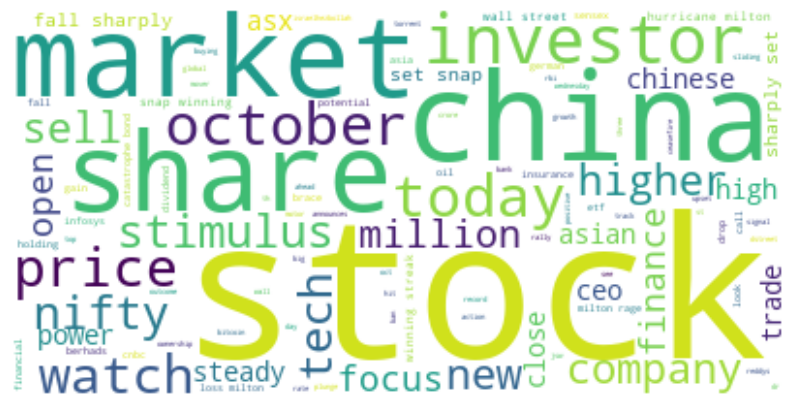

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud of the most frequent words
text = ' '.join(df['joined_tokens'])
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [36]:
df.to_csv('../data/processed_news_headlines.csv', index=False)